# Capstone Project 2 - Part 1 - Data Wrangling

In [2]:
import pandas as pd
import datetime
import numpy as np
import gzip
from sympy.solvers import solve #algebra solving
from sympy import Symbol
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from numpy import nan
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Import Data

In [3]:
#import Reject Data
Reject_Loan_Data = {}
Reject_Loan_Data = pd.read_csv(r'''C:\Users\Charles\Desktop\Data Science\Capstone Project 2\rejected_2007_to_2018Q4.csv.gz''',dtype={19: str, 47: str, 55: str, 112: str, 123: str, 124: str, 125: str, 128: str, 129: str, 130: str, 133: str, 139: str, 140: str, 141: str})

In [4]:
#import Approved Data
Approved_Loan_Data = {}
Approved_Loan_Data = pd.read_csv(r'''C:\Users\Charles\Desktop\Data Science\Capstone Project 2\accepted_2007_to_2018Q4.csv.gz''',dtype={0: str,19: str, 49: str, 59: str, 118: str, 129: str, 130: str, 131: str, 134: str, 135: str, 136: str,139: str, 145: str, 146: str, 147: str})


In [5]:
#truncate the columns of the approved data set in order to match the metrics of the rejected data set. 
Truncate_Columns = {}
Truncate_Columns = pd.read_csv(r'''C:\Users\Charles\Desktop\Data Science\Capstone Project 2\Truncate_Columns_v2.csv''')

# Clean up approved data

In [6]:
#import columns to keep for approved data
Truncate_Approved_Loan_Data = Approved_Loan_Data.filter(Truncate_Columns['Columns To Keep'])

In [7]:
# check for data with null data
#pd.options.display.max_seq_items = 2000
Truncate_Approved_Loan_Data.isnull().any()

emp_length                 True
addr_state                 True
dti                        True
dti_joint                  True
loan_amnt                  True
sec_app_fico_range_low     True
sec_app_fico_range_high    True
fico_range_high            True
fico_range_low             True
dtype: bool

In [8]:
#delete loans with null values

null_data_delete = Truncate_Approved_Loan_Data[Truncate_Approved_Loan_Data['loan_amnt'].isnull()]
Clean_Truncate_Approved_Loan_Data=Truncate_Approved_Loan_Data.drop(null_data_delete.index.values)
null_data_delete = Clean_Truncate_Approved_Loan_Data[Clean_Truncate_Approved_Loan_Data['emp_length'].isnull()]
Clean_Truncate_Approved_Loan_Data=Clean_Truncate_Approved_Loan_Data.drop(null_data_delete.index.values)
null_data_delete = Clean_Truncate_Approved_Loan_Data[Clean_Truncate_Approved_Loan_Data['dti'].isnull()]
Clean_Truncate_Approved_Loan_Data=Clean_Truncate_Approved_Loan_Data.drop(null_data_delete.index.values)
Clean_Truncate_Approved_Loan_Data.isnull().any()

emp_length                 False
addr_state                 False
dti                        False
dti_joint                   True
loan_amnt                  False
sec_app_fico_range_low      True
sec_app_fico_range_high     True
fico_range_high            False
fico_range_low             False
dtype: bool

In [9]:
#average dti and dti_joint columns

Clean_Truncate_Approved_Loan_Data['Debt_To_Income_Ratio'] = Clean_Truncate_Approved_Loan_Data[['dti', 'dti_joint']].mean(axis=1) / 100.0

In [10]:
#average primary and secondary borrowers' top and bottom range of FICO score. Approved data is all FICO score. Reject data has vantagescore starting in  2013
Clean_Truncate_Approved_Loan_Data['Risk_Score'] = Clean_Truncate_Approved_Loan_Data[['sec_app_fico_range_low', 'sec_app_fico_range_high','fico_range_high','fico_range_low']].mean(axis=1)

In [11]:
#Clean up column names
Clean_Truncate_Approved_Loan_Data = Clean_Truncate_Approved_Loan_Data.rename(columns={"emp_length": "Employment_Length", "addr_state": "State", "loan_amnt": "Loan_Amount"})
#Label data for approved: 1
Clean_Truncate_Approved_Loan_Data['Approved_Reject'] = 1

In [12]:
Clean_Truncate_Approved_Loan_Data.columns

Index(['Employment_Length', 'State', 'dti', 'dti_joint', 'Loan_Amount',
       'sec_app_fico_range_low', 'sec_app_fico_range_high', 'fico_range_high',
       'fico_range_low', 'Debt_To_Income_Ratio', 'Risk_Score',
       'Approved_Reject'],
      dtype='object')

In [13]:
Clean_Truncate_Approved_Loan_Data.isnull().any()

Employment_Length          False
State                      False
dti                        False
dti_joint                   True
Loan_Amount                False
sec_app_fico_range_low      True
sec_app_fico_range_high     True
fico_range_high            False
fico_range_low             False
Debt_To_Income_Ratio       False
Risk_Score                 False
Approved_Reject            False
dtype: bool

In [14]:
Clean_Truncate_Approved_Loan_Data.head()

,Employment_Length,State,dti,dti_joint,Loan_Amount,sec_app_fico_range_low,sec_app_fico_range_high,fico_range_high,fico_range_low,Debt_To_Income_Ratio,Risk_Score,Approved_Reject
0,10+ years,PA,5.91,NaN,3600.0,NaN,NaN,679.0,675.0,0.05910,677.0,1
1,10+ years,SD,16.06,NaN,24700.0,NaN,NaN,719.0,715.0,0.16060,717.0,1
2,10+ years,IL,10.78,13.85,20000.0,NaN,NaN,699.0,695.0,0.12315,697.0,1
3,10+ years,NJ,17.06,NaN,35000.0,NaN,NaN,789.0,785.0,0.17060,787.0,1
4,3 years,PA,25.37,NaN,10400.0,NaN,NaN,699.0,695.0,0.25370,697.0,1


In [15]:
pd.options.display.float_format = "{:.2f}".format
Clean_Truncate_Approved_Loan_Data.describe()

,dti,dti_joint,Loan_Amount,sec_app_fico_range_low,sec_app_fico_range_high,fico_range_high,fico_range_low,Debt_To_Income_Ratio,Risk_Score,Approved_Reject
count,2113648.00,104043.00,2113648.00,92638.00,92638.00,2113648.00,2113648.00,2113648.00,2113648.00,2113648.00
mean,18.58,19.17,15250.21,670.91,674.91,702.41,698.40,0.18,699.47,1.00
std,11.81,7.68,9221.12,44.07,44.07,32.72,32.72,0.09,32.40,0.00
min,-1.00,0.00,500.00,540.00,544.00,614.00,610.00,-0.01,602.00,1.00
25%,11.86,13.56,8000.00,645.00,649.00,679.00,675.00,0.12,674.50,1.00
50%,17.73,18.77,13100.00,670.00,674.00,694.00,690.00,0.18,692.00,1.00
75%,24.32,24.42,20000.00,695.00,699.00,719.00,715.00,0.24,717.00,1.00
max,999.00,63.66,40000.00,845.00,850.00,850.00,845.00,5.18,847.50,1.00


In [16]:
#determine how many loans are over 0.5 DTI
Clean_Truncate_Approved_Loan_Data[Clean_Truncate_Approved_Loan_Data['Debt_To_Income_Ratio']>0.5].count()

Employment_Length          3249
State                      3249
dti                        3249
dti_joint                  3249
Loan_Amount                3249
sec_app_fico_range_low     3071
sec_app_fico_range_high    3071
fico_range_high            3249
fico_range_low             3249
Debt_To_Income_Ratio       3249
Risk_Score                 3249
Approved_Reject            3249
dtype: int64

In [17]:
#removed outliers for DTI over 50%. These loans were probably approved based on non-standard metrics.
Approved_Outlier_data_delete = Clean_Truncate_Approved_Loan_Data[Clean_Truncate_Approved_Loan_Data['Debt_To_Income_Ratio']>0.5]
Clean_Truncate_Approved_Loan_Data=Clean_Truncate_Approved_Loan_Data.drop(Approved_Outlier_data_delete.index.values)

# Cleanup Reject Data

In [19]:
#remove the remaining unnecessary columns
Reject_Loan_Data=Reject_Loan_Data[['Amount Requested','Application Date','Debt-To-Income Ratio', 'State','Employment Length', 'Risk_Score']]

In [20]:
# check for data with null data
Reject_Loan_Data.isnull().any()

Amount Requested        False
Application Date        False
Debt-To-Income Ratio    False
State                    True
Employment Length        True
Risk_Score               True
dtype: bool

In [21]:
#delete any rows containing null data
null_data_delete = Reject_Loan_Data[Reject_Loan_Data['State'].isnull()]
Clean_Reject_Loan_Data=Reject_Loan_Data.drop(null_data_delete.index.values)
null_data_delete = Clean_Reject_Loan_Data[Clean_Reject_Loan_Data['Employment Length'].isnull()]
Clean_Reject_Loan_Data=Clean_Reject_Loan_Data.drop(null_data_delete.index.values)
null_data_delete = Clean_Reject_Loan_Data[Clean_Reject_Loan_Data['Risk_Score'].isnull()]
Clean_Reject_Loan_Data=Clean_Reject_Loan_Data.drop(null_data_delete.index.values)


In [22]:
Clean_Reject_Loan_Data.isnull().any()

Amount Requested        False
Application Date        False
Debt-To-Income Ratio    False
State                   False
Employment Length       False
Risk_Score              False
dtype: bool

In [23]:
#Clean up column names
Clean_Reject_Loan_Data = Clean_Reject_Loan_Data.rename(columns={"Employment Length": "Employment_Length", "State": "State", "Amount Requested": "Loan_Amount", "Debt-To-Income Ratio":"Unclean_Debt_To_Income_Ratio"})
#Label data for approved: 1
Clean_Reject_Loan_Data['Approved_Reject'] = 0

In [24]:
Clean_Reject_Loan_Data['Debt_To_Income_Ratio']=Clean_Reject_Loan_Data['Unclean_Debt_To_Income_Ratio'].str.rstrip('%').astype('float') / 100.0

In [25]:
pd.options.display.float_format = "{:.2f}".format
Clean_Reject_Loan_Data.describe()

,Loan_Amount,Risk_Score,Approved_Reject,Debt_To_Income_Ratio
count,8992576.00,8992576.00,8992576.00,8992576.00
mean,12634.67,627.35,0.00,1.70
std,10902.97,89.93,0.00,177.68
min,0.00,0.00,0.00,-0.01
25%,4000.00,591.00,0.00,0.09
50%,10000.00,636.00,0.00,0.21
75%,20000.00,674.00,0.00,0.36
max,1400000.00,990.00,0.00,500000.31


In [26]:
#remove DTI over 0.5 as these are outliers
DTI_Outlier_data_delete = Clean_Reject_Loan_Data[Clean_Reject_Loan_Data['Debt_To_Income_Ratio']>0.5]
Clean_Reject_Loan_Data=Clean_Reject_Loan_Data.drop(DTI_Outlier_data_delete.index.values)

#remove Loan Amount of 0 as these are probably data quality issues
LM_Outlier_data_delete = Clean_Reject_Loan_Data[Clean_Reject_Loan_Data['Loan_Amount']==0]
Clean_Reject_Loan_Data=Clean_Reject_Loan_Data.drop(LM_Outlier_data_delete.index.values)


In [27]:
LM_Outlier_data_delete.count()

Loan_Amount                     2
Application Date                2
Unclean_Debt_To_Income_Ratio    2
State                           2
Employment_Length               2
Risk_Score                      2
Approved_Reject                 2
Debt_To_Income_Ratio            2
dtype: int64

# Approved Data Stratified Sampling
Data is too large. Not enough computation power to perform machine learning algorithms

In [28]:
#retain 5% of data for each Loan Amount
Clean_Truncate_Approved_Loan_Data = Clean_Truncate_Approved_Loan_Data.groupby('Loan_Amount').apply(lambda x: x.sample(frac=0.05))
Clean_Truncate_Approved_Loan_Data = Clean_Truncate_Approved_Loan_Data.reset_index(drop=True)

# Reject Data Stratified Sampling

In [29]:
#Check Shape of Data Frame
R_r, R_c = Reject_Loan_Data.shape
CR_r, CR_c = Clean_Reject_Loan_Data.shape
TA_r, TA_c = Clean_Truncate_Approved_Loan_Data.shape
#list(Loan_Data)
print(R_r, R_c)
print(CR_r, CR_c)
print(TA_r,TA_c)
print(CR_r/(TA_r+CR_r))

27648741 6
7842671 8
105547 12
0.9867206712246694


There are too many Reject Data relative to Approved data. We want to achieve 30/70 ratio

In [30]:
#use algebra to derive how much data is needed for rejected dataset in order to achieve the 30/70 ratio
x = Symbol('x')
data_need = int(solve(TA_r/(TA_r+x)-.3, x)[0])
print("Need to reduce ", CR_r - data_need, " number of rows in reject data")

# % of reject data to retain. 
percentage_retain = data_need/CR_r

Need to reduce  7596395  number of rows in reject data


In [32]:
#stratified sampling based on % needed to be retained
Stratified_Clean_Reject_Loan_Data = Clean_Reject_Loan_Data.groupby('Loan_Amount').apply(lambda x: x.sample(frac=percentage_retain))

In [33]:
#drop excess data rows
Stratified_Clean_Reject_Loan_Data = Stratified_Clean_Reject_Loan_Data.reset_index(drop=True)

In [34]:
#check to see if 30/70 ratio has been achieved
SCR_r, SCR_c = Stratified_Clean_Reject_Loan_Data.shape
print(SCR_r/(TA_r+SCR_r))

0.6999587804704712


# Standardization FICO/Vantage Score data
Reject data post November 5, 2013 uses Vantage score and FICO before the date. Approved data all use FICO score

In [35]:
#convert from str to datetime
Stratified_Clean_Reject_Loan_Data["Application Date"]=pd.to_datetime(Stratified_Clean_Reject_Loan_Data["Application Date"], format = "%Y-%m-%d")

In [36]:
#calculate mean and std. Method is (x-mean)/std
#rejected data is calculated based on date as it switches from FICO to Vantage score
R_Vantage_mean = Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']>='2013-09-05'].mean()
R_Vantage_std = Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']>='2013-09-05'].std()

R_FICO_mean = Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']<'2013-09-05'].mean()
R_FICO_std = Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']<'2013-09-05'].std()

A_FICO_mean = Clean_Truncate_Approved_Loan_Data['Risk_Score'].mean()
A_FICO_std = Clean_Truncate_Approved_Loan_Data['Risk_Score'].std()

Stratified_Clean_Reject_Loan_Data.loc[Stratified_Clean_Reject_Loan_Data['Application Date']>='2013-09-05','Normalized_Risk_Score']=(Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']>='2013-09-05']-R_Vantage_mean)/R_Vantage_std
Stratified_Clean_Reject_Loan_Data.loc[Stratified_Clean_Reject_Loan_Data['Application Date']<'2013-09-05','Normalized_Risk_Score']=(Stratified_Clean_Reject_Loan_Data['Risk_Score'][Stratified_Clean_Reject_Loan_Data['Application Date']<'2013-09-05']-R_FICO_mean)/R_FICO_std

Clean_Truncate_Approved_Loan_Data['Normalized_Risk_Score']=(Clean_Truncate_Approved_Loan_Data['Risk_Score']-A_FICO_mean)/A_FICO_std

In [37]:
print(Stratified_Clean_Reject_Loan_Data[['Normalized_Risk_Score','Risk_Score']][Stratified_Clean_Reject_Loan_Data['Application Date']>'2013-09-05'].head())

    Normalized_Risk_Score  Risk_Score
12                  -0.29      611.00
13                  -0.36      606.00
14                   0.04      633.00
15                  -1.90      501.00
16                  -1.27      544.00


In [38]:
print(R_Vantage_mean)
print(R_Vantage_std)
print(R_FICO_mean)
print(R_FICO_std)
print(Stratified_Clean_Reject_Loan_Data.index.is_unique)

630.5463016230796
68.28011453078896
591.9503834670102
176.7675546810777
True


# Merge Approved and Rejected Data

In [39]:
Stratified_Clean_Reject_Loan_Data.columns

Index(['Loan_Amount', 'Application Date', 'Unclean_Debt_To_Income_Ratio',
       'State', 'Employment_Length', 'Risk_Score', 'Approved_Reject',
       'Debt_To_Income_Ratio', 'Normalized_Risk_Score'],
      dtype='object')

In [40]:
Clean_Truncate_Approved_Loan_Data.columns

Index(['Employment_Length', 'State', 'dti', 'dti_joint', 'Loan_Amount',
       'sec_app_fico_range_low', 'sec_app_fico_range_high', 'fico_range_high',
       'fico_range_low', 'Debt_To_Income_Ratio', 'Risk_Score',
       'Approved_Reject', 'Normalized_Risk_Score'],
      dtype='object')

In [72]:
#ignore index = true is important as it avoids duplicated index number
Merged_Data = pd.concat([Stratified_Clean_Reject_Loan_Data[['Loan_Amount','Debt_To_Income_Ratio', 'State', 'Employment_Length','Normalized_Risk_Score', 'Approved_Reject']], Clean_Truncate_Approved_Loan_Data[['Loan_Amount','Debt_To_Income_Ratio', 'State', 'Employment_Length','Normalized_Risk_Score', 'Approved_Reject']]], axis = 0,ignore_index=True)

In [73]:
Merged_Data.columns

Index(['Loan_Amount', 'Debt_To_Income_Ratio', 'State', 'Employment_Length',
       'Normalized_Risk_Score', 'Approved_Reject'],
      dtype='object')

In [74]:
#check if index is unique. Had issue where there were duplicate indexes. 
print(Merged_Data.index.is_unique)

True


# Converting Employment_Length to Int

In [76]:
#to take a look at what employment years are available.
Merged_Data.groupby('Employment_Length').count()

,Loan_Amount,Debt_To_Income_Ratio,State,Normalized_Risk_Score,Approved_Reject
Employment_Length,,,,,
1 year,9749,9749,9749,9749,9749
10+ years,43555,43555,43555,43555,43555
2 years,12589,12589,12589,12589,12589
3 years,11061,11061,11061,11061,11061
4 years,8238,8238,8238,8238,8238
5 years,13648,13648,13648,13648,13648
6 years,6227,6227,6227,6227,6227
7 years,5484,5484,5484,5484,5484
8 years,5495,5495,5495,5495,5495


In [77]:
#convert column into numbers by getting rid of 'year' at the end and <1 and +10 into 0 & 10
Merged_Data['Employment_Length'] = Merged_Data['Employment_Length'].apply(lambda x: 10 if x == '10+ years' else (0 if x == '< 1 year' else (1 if x == '1 year' else str(x)[:-6])))

# Split out States into Regions
## Based on Bureau of Economic Analysis regions split

In [78]:
#Check data quality of state column
Merged_Data.State.nunique()

51

In [80]:
New_England = ['CT','ME', 'MA', 'NH', 'RI', 'VT']
Mideast = ['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']
Great_Lakes = ['IL', 'ID','MI', 'OH','WI']
Plains = ['IA', 'KS', 'MN', 'MO', 'NE','ND','SD']
Southeast = ['AL', 'AR', 'FL', 'GA', 'KY','LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']
Southwest = ['AZ', 'NM', 'OK', 'TX']
Rocky_Mountain = ['CO','ID', 'MT', 'UT', 'WY']
Far_West = ['AK', 'CA', 'HI', 'NV', 'OR', 'WA']

In [81]:
def Search_List(List, data):
    if (data in List): 
        return True
    else:
        return False
    
Merged_Data['Region'] = Merged_Data['State'].apply(lambda x: 'New_England' if Search_List(New_England, x) else \
                                                   ('Mideast' if Search_List(Mideast, x) else \
                                                   ('Great_Lakes' if Search_List(Great_Lakes, x) else \
                                                   ('Plains' if Search_List(Plains, x) else \
                                                   ('Southeast' if Search_List(Southeast, x) else \
                                                   ('Southwest' if Search_List(Southwest, x) else \
                                                   ('Rock_Mountain' if Search_List(Rocky_Mountain, x) else \
                                                   ('Far_West' if Search_List(Far_West, x) else 'N/A'))))))))

In [82]:
#check data
Merged_Data[Merged_Data['Region']=='Far_West'].head()

,Loan_Amount,Debt_To_Income_Ratio,State,Employment_Length,Normalized_Risk_Score,Approved_Reject,Region
4,500.00,0.09,CA,2,0.38,0,Far_West
8,500.00,0.00,CA,1,-0.67,0,Far_West
11,800.00,0.00,NV,1,-0.39,0,Far_West
14,1000.00,0.16,CA,0,0.04,0,Far_West
16,1000.00,0.18,CA,0,-1.27,0,Far_West


In [83]:
#check data type
Merged_Data.dtypes

Loan_Amount              float64
Debt_To_Income_Ratio     float64
State                     object
Employment_Length         object
Normalized_Risk_Score    float64
Approved_Reject            int64
Region                    object
dtype: object

In [84]:
#convert to int
Merged_Data['Employment_Length']=Merged_Data.Employment_Length.astype(int)

In [85]:
pd.options.display.float_format = "{:.2f}".format
Merged_Data.describe()

,Loan_Amount,Debt_To_Income_Ratio,Employment_Length,Normalized_Risk_Score,Approved_Reject
count,351775.00,351775.00,351775.00,351775.00,351775.00
mean,13164.24,0.19,2.18,-0.00,0.30
std,10373.31,0.12,3.59,1.00,0.46
min,500.00,-0.01,0.00,-9.23,0.00
25%,5000.00,0.09,0.00,-0.63,0.00
50%,10000.00,0.18,0.00,0.02,0.00
75%,20000.00,0.27,3.00,0.55,1.00
max,60000.00,0.50,10.00,5.26,1.00


# Data Exploration

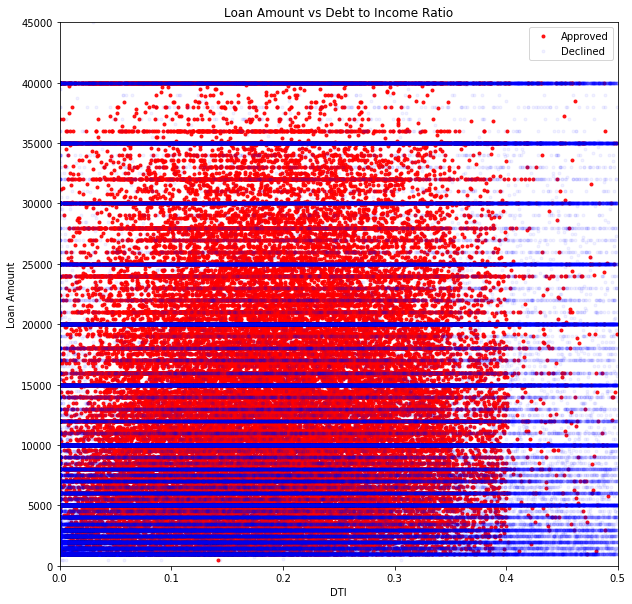

In [86]:
#to show that DTI of 0.4 is a crucial number and no loan amount over $40k is present
Approved_Data = Merged_Data[Merged_Data['Approved_Reject']==1]
Declined_Data = Merged_Data[Merged_Data['Approved_Reject']==0]
fig = plt.figure(figsize=(10,10))
_ = plt.plot(Approved_Data.Debt_To_Income_Ratio, Approved_Data.Loan_Amount, marker='.', linestyle='none', color = 'red',alpha=0.9,lw=1, label='Approved')
_ = plt.plot(Declined_Data.Debt_To_Income_Ratio, Declined_Data.Loan_Amount, marker='.', linestyle='none', color = 'blue', lw=1, alpha = 0.05,label='Declined')
_ = plt.ylabel('Loan Amount')
_ = plt.xlabel('DTI')
_ = plt.title('Loan Amount vs Debt to Income Ratio')
_ = plt.ylim((0,45000))
_ = plt.xlim((0,.5))
plt.legend(loc='best')
plt.show()

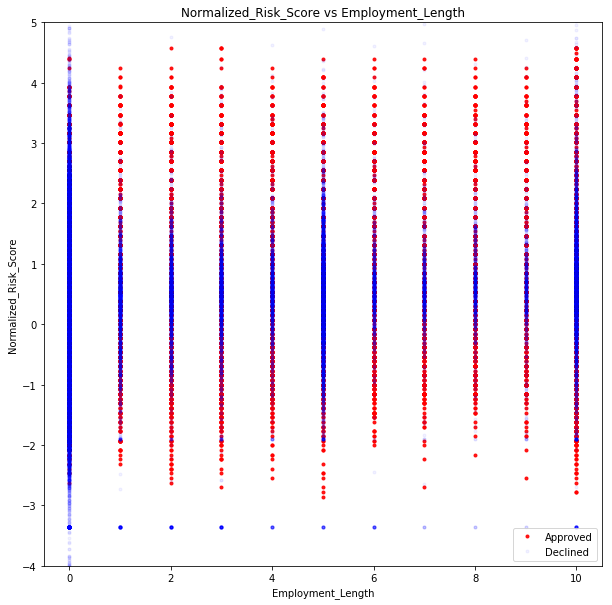

In [87]:
# to see how employment_length looks optically since it has such high correlation to labeling
App_Xdata = Approved_Data.Employment_Length.astype(float)
Dec_Xdata = Declined_Data.Employment_Length.astype(float)
fig = plt.figure(figsize=(10,10))
_ = plt.plot(App_Xdata, Approved_Data.Normalized_Risk_Score, marker='.', linestyle='none', color = 'red',alpha=0.9,lw=1, label='Approved')
_ = plt.plot(Dec_Xdata, Declined_Data.Normalized_Risk_Score, marker='.', linestyle='none', color = 'blue', lw=1, alpha = 0.05,label='Declined')
_ = plt.ylabel('Normalized_Risk_Score')
_ = plt.xlabel('Employment_Length')
_ = plt.title('Normalized_Risk_Score vs Employment_Length')
_ = plt.ylim((-4,5))
#_ = plt.xlim((0,.5))
plt.legend(loc='best')
plt.show()

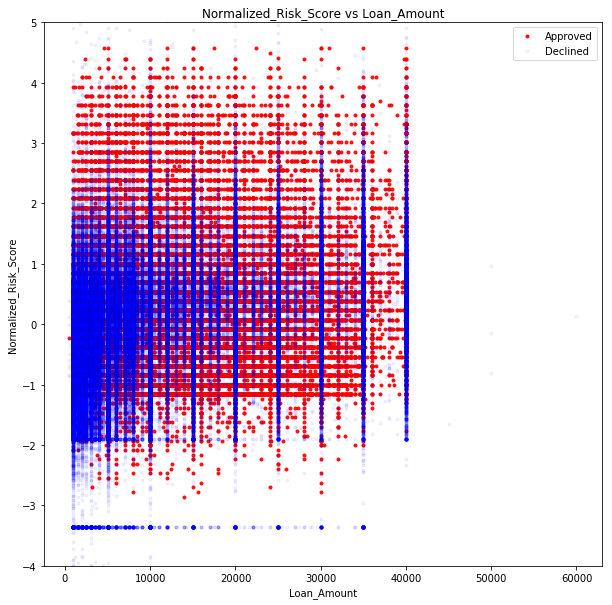

In [88]:
#to take a look at normalized_risk_score. Separation is not as obvious as the other graphs. It is noted that the approved dataset has more in the higher portion of the graph
fig = plt.figure(figsize=(10,10))
_ = plt.plot(Approved_Data.Loan_Amount, Approved_Data.Normalized_Risk_Score, marker='.', linestyle='none', color = 'red',alpha=0.9,lw=1, label='Approved')
_ = plt.plot(Declined_Data.Loan_Amount, Declined_Data.Normalized_Risk_Score, marker='.', linestyle='none', color = 'blue', lw=1, alpha = 0.05,label='Declined')
_ = plt.ylabel('Normalized_Risk_Score')
_ = plt.xlabel('Loan_Amount')
_ = plt.title('Normalized_Risk_Score vs Loan_Amount')
_ = plt.ylim((-4,5))
#_ = plt.xlim((0,.5))
plt.legend(loc='best')
plt.show()

In [89]:

#create correlation table
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = Merged_Data.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify()) 

,Loan_Amount,Debt_To_Income_Ratio,Employment_Length,Normalized_Risk_Score,Approved_Reject
Loan_Amount,1,0.18,0.14,0.23,0.13
Debt_To_Income_Ratio,0.18,1,-0.034,0.15,-0.032
Employment_Length,0.14,-0.034,1,0.074,0.68
Normalized_Risk_Score,0.23,0.15,0.074,1,2.9e-15
Approved_Reject,0.13,-0.032,0.68,2.9e-15,1


## Format to MS accepted form

In [90]:
#convert string into numbers
labelencoder = LabelEncoder()
Merged_Data['Test_Region'] = labelencoder.fit_transform(Merged_Data['Region'])

In [91]:
#Merged_Data[['Test_Region','Region']].head()

Merged_Data[Merged_Data['Test_Region']==7][['Region', 'Test_Region']].head(1)

,Region,Test_Region
0,Southeast,7


In [92]:
#convert row into binary columns
onehotencoder = OneHotEncoder(categorical_features = [0],sparse=False)
New_Data=Merged_Data['Test_Region'].values.reshape(-1,1)
New_Data2 = onehotencoder.fit_transform(New_Data)

In [93]:
#New_Data = pd.get_dummies(Merged_Data['Region'],prefix=['Region'])

In [94]:
#New_Data2 = pd.DataFrame(New_Data)  
New_Data2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [95]:
#convert from Narray to dataframe
MS_Data = pd.DataFrame(data=New_Data2[0:,0:])


In [96]:
MS_Data.head(16)

,0,1,2,3,4,5,6,7,8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
8,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [100]:
#Merged Data
MS_Data = MS_Data.merge(Merged_Data,left_index=True, right_index=True)


In [101]:
#remove columns as they are now converted into binary columns
MS_Data=MS_Data.drop(columns=["State",'Region', 'Test_Region'])

In [102]:
MS_Data.head(5)

,0,1,2,3,4,5,6,7,8,Loan_Amount,Debt_To_Income_Ratio,Employment_Length,Normalized_Risk_Score,Approved_Reject
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,500.00,0.31,6,-0.01,0
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.00,1,-0.85,0
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,500.00,0.06,2,-0.72,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,500.00,0.04,1,-0.83,0
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.09,2,0.38,0


In [103]:
#export into csv file as the data wrangling took too much memory. Need to empty out memory in order to run MS algorithms.
export_csv = MS_Data.to_csv (r'''C:\Users\Charles\Desktop\Data Science\Capstone Project 2\MS_Data.csv''', index = None, header=True)